### Linear Discriminant Analysis

* Applied on Supervised Dataset
* It helps in classification by a maximizing the separatibility between the classes.
* Similar to PCA, but maximizes the separability among known categories.
* LDA creates new axis and projects the datapoints on it while maximizing the separability between them.
* New axis is created by following two criteria simultaneously:
    * First, once the axis is created, maximise the distance between the two mean.
    * Second, minimize the variance (scatter) within each group or class.


In [1]:
import numpy as np

In [9]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
    
    def fit(self, X, y):
        n_features = X.shape[1]
        labels = np.unique(y)
        
        mean = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        
        for c in labels:
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)
            
            #within class scatter matrix
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean).reshape(n_features, 1)
            
            #Between class scatter matrix
            SB += n_c * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(SW).dot(SB)
        
        eigenValues, eigenVectors = np.linalg.eig(A)
        eigenVectors = eigenVectors.T
        
        idxs = np.argsort(abs(eigenValues))[::-1]
        
        eigenValues = eigenValues[idxs]
        eigenVectors = eigenVectors[idxs]
        
        self.linear_discriminants = eigenVectors[0: self.n_components]
        
    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


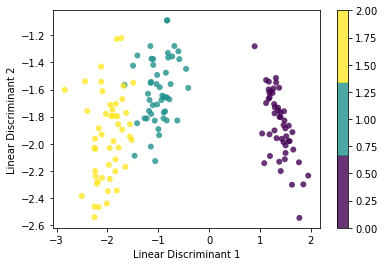

In [10]:
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    data = datasets.load_iris()
    X, y = data.data, data.target

    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()
    plt.show()